In [1]:
%matplotlib inline

In [2]:
import os
import sys
import git
import pathlib

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

PROJ_ROOT_PATH = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
PROJ_ROOT =  str(PROJ_ROOT_PATH)
if PROJ_ROOT not in sys.path:
    sys.path.append(PROJ_ROOT)

from libs.constants import error_seeds

In [3]:
import matplotlib.pyplot as plt
np.random.seed(28347)

In [4]:
# Vizualize ERROR_PROFILE
ERR_PROF_TAG = "LIM_100"
error_seed = error_seeds[0]
error_profile_tag = ERR_PROF_TAG+"-"+str(error_seed)

In [5]:
# Load error profile
error_profile_folder = pathlib.Path(PROJ_ROOT_PATH / "error_profiles")
error_profile_filename = error_profile_tag + ".npy"
error_profile_file = pathlib.Path(error_profile_folder/ error_profile_filename)

In [6]:
error_profile = np.load(error_profile_file)
error_instance = np.random.binomial(1,error_profile)


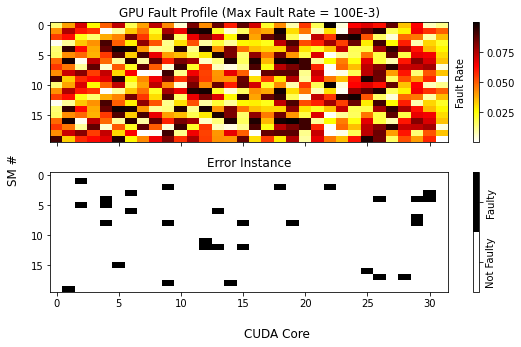

In [7]:
fig_width = 3.125/0.8 *2
fig_height = fig_width / 1.618 
n_rows = 2
n_cols = 1
fig, axs = plt.subplots(nrows=n_rows,
                        ncols=n_cols,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True,
                        sharey=True,
                        constrained_layout=False, 
                        # tight_layout=True
                       )
# plt.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=0.05, hspace=0.1)

err_prof = axs[0].imshow(error_profile[:20], 
           cmap='hot_r', 
           interpolation='nearest',
           aspect='auto')
axs[0].set_yticks(np.linspace(0,20,5))
plt.colorbar(err_prof, 
             ax=axs[0],
             # orientation='horizontal', 
             ticks = np.linspace(0,10,5)*0.01,
            )
axs[0].set_title("GPU Fault Profile (Max Fault Rate = 100E-3)")
axs[0].text(1.02, 0.5, 
           "Fault Rate",
            rotation=90,
           verticalalignment='center', 
           transform=axs[0].transAxes)

cmap_discrete = plt.get_cmap('gray_r', 2)
err_inst = axs[1].imshow(error_instance[:20], 
           cmap=cmap_discrete, 
           interpolation='nearest',
           aspect='auto')
axs[1].set_title("Error Instance")

err_inst_cbar = plt.colorbar(err_inst, 
             ax=axs[1],
             # orientation='horizontal', 
             ticks = [0.25,0.75],
            )
err_inst_cbar.set_ticklabels(["Not Faulty","Faulty"],rotation=90, va="center")

fig.supylabel("SM #")
fig.supxlabel("CUDA Core")
fig.tight_layout()

In [8]:
# Get notebook path
import ipynbname
nb_path = str(ipynbname.path())
fig_filename_tag = "error_profile"
fig_folder = pathlib.Path(PROJ_ROOT_PATH / "figures")
pathlib.Path(fig_folder).mkdir(parents=True, exist_ok=True)
fig_filename = pathlib.Path(fig_folder/ fig_filename_tag)
print(fig_filename)
fig.savefig(fig_filename,
    # pathlib.Path(fig_filename).with_suffix(".png"), 
            dpi=300, 
            bbox_inches='tight', 
            transparent=True, 
            metadata={"genfilepath": nb_path})

/repos/faulty_cnn/figures/error_profile
